<div style="text-align:center; color: blue"><h1>Sprint 6: Mchine Learning - regresion models</h1></div>

**EJERCICIO 1**: Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.

In [3]:
#importamos las librearias necesarias
import pandas as pd
import re

#Importamos el dataset
dataset = pd.read_csv('../sprint_5/Tarea_2/housing_data.csv', header=None)

with open('../sprint_5/Tarea_2/housing_data_description.txt', 'r') as f:
    content = f.read()


pattern = re.compile(r'\d+\.\s+([A-Z]+)')
column_names = pattern.findall(content)

relevant_column_names = column_names[column_names.index('CRIM'):column_names.index('MEDV')+1]
#asignamos los nombres de las columnas al dataset
dataset.columns = relevant_column_names
#ahora vamos a visualizar los datos
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Modelo 1: Regresión lineal, elegi este por que es el mas usado y el mas sencillo de entender.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [8]:
#definimos las caracteristicas y la variable objetivo
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']

#Echamos un vistazo a los datos
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
#Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Echa un vistazo a los datos de entrenamiento
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28


In [10]:
#Creamos un modelo de regresion lineal
linear_model = LinearRegression()
#Entrenamos el modelo
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
#usamos los datos de test para hacer predicciones
y_pred = linear_model.predict(X_test)

In [13]:
#Calculamos el error cuadratico medio o mse
linear_mse = mean_squared_error(y_test, y_pred)
print('Linear MSE: ', linear_mse)

Linear MSE:  24.291119474973385


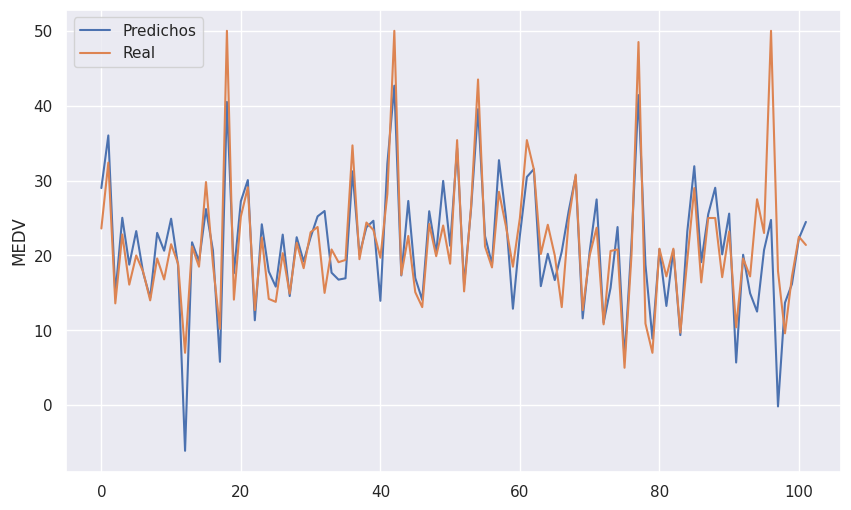

In [17]:
#graficamos los resultados real vs predicho
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predichos')
plt.plot(y_test.values, label='Real')
plt.ylabel('MEDV')
plt.legend()
plt.show()

### Modelo 2: Random Forest Regresor, elegí este otro porque es un modelo de ensamble basado en árboles que puede capturar relaciones no lineales y complejas entre las características y la variable objetivo.

In [18]:
#creamos el modelo de random forest
rf_model = RandomForestRegressor()
#entrenamos el modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
#usamos los datos de test para hacer predicciones
y_pred = rf_model.predict(X_test)

In [20]:
#cCalculamos el error cuadratico medio o mse
rf_mse = mean_squared_error(y_test, y_pred)
print('Random Forest MSE: ', rf_mse)

Random Forest MSE:  8.982253323529408


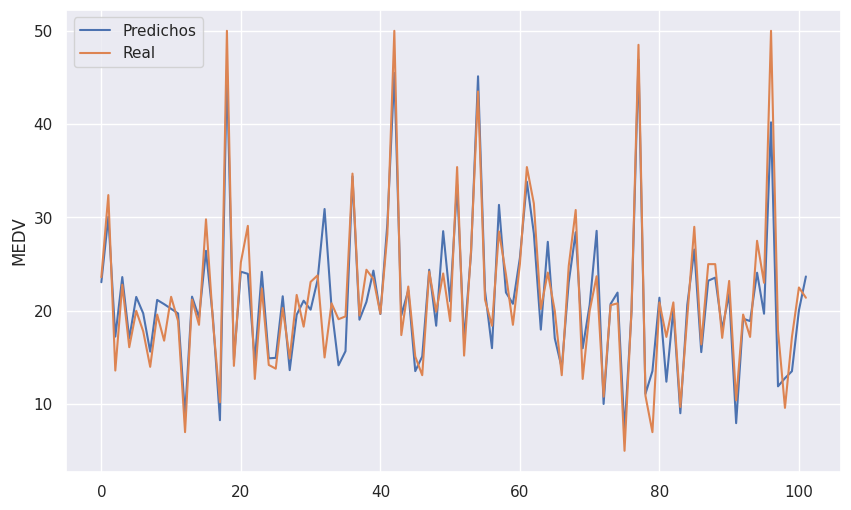

In [21]:
#graficamos los resultados real vs predicho
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predichos')
plt.plot(y_test.values, label='Real')

plt.ylabel('MEDV')
plt.legend()
plt.show()

**EJERCICIO 2**: Compáralos en base al MSE  y al R2

In [22]:
#obtenemos el MSE  y R2 de ambos modelos
print('Linear MSE: ', linear_mse)
print('Random Forest MSE: ', rf_mse)

Linear MSE:  24.291119474973385
Random Forest MSE:  8.982253323529408


In [23]:
#obtenemos el R2 de ambos modelos
print('Linear R2: ', linear_model.score(X_test, y_test))
print('Random Forest R2: ', rf_model.score(X_test, y_test))

Linear R2:  0.6687594935356338
Random Forest R2:  0.8775154787270101


**Análisis de los resultados:** En base a los estadísticos mse y r2, el modelo de random forest es el que mejor se ajusta a los datos, ya que tiene un mse mucho menor y un r2 mayor.

**EJERCICIO 3**: Entrenalos utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.

* La inclusión de parámetros en los modelos es un proceso que se conoce como "tuning" o afinamiento o ajuste de hiperparámetros.
* Al haber usado un modelo de regresion lineal, no hay parámetros que se puedan ajustar. Sin embargo vamos a probar con un modelo de regresion lineal regularizado, que si tiene parámetros que se pueden ajustar.
    - Usaré la Regresion Ridge: es una técnica de regresión lineal que incluye una penalización o regularización. Esta regularización busca evitar que los coeficientes de las variables tomen valores extremadamente grandes, lo que podría indicar que se está sobreajustando a los datos de entrenamiento. La regularización que utiliza Ridge es la L2, lo que significa que penaliza los coeficientes en función del cuadrado de sus valores. 

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [26]:
# Modelo 1: Ridge Regression (Regresión Lineal con Regularización L2)
parameters_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100], # Controla la fuerza de regularización, cuanto mayor sea, más regularización
    'fit_intercept': [True, False], # Si queremos que el modelo tenga intercepto o no
}

ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, parameters_ridge, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) # n_jobs=-1 para usar todos los procesadores, cv=5 para validación cruzada con 5 folds, scoring='neg_mean_squared_error' para usar MSE como métrica
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_

In [27]:
mse_ridge = mean_squared_error(y_test, best_ridge.predict(X_test))
print(f"Error Cuadrático Medio para Ridge Regression: {mse_ridge}")

Error Cuadrático Medio para Ridge Regression: 24.291177851311243


In [28]:
# Modelo 2: Random Forest Regressor
parameters_rf = {
    'n_estimators': [50, 100, 200], # Número de árboles
    'max_depth': [None, 10, 20, 30], # Profundidad máxima de cada árbol, si es None, se expande hasta que todas las hojas sean puras
    'min_samples_split': [2, 5, 10], # Número mínimo de muestras para hacer split en un nodo, 2, 5, y 10 son valores comunes
    'min_samples_leaf': [1, 2, 4] # Número mínimo de muestras en un nodo hoja, 1, 2, y 4 son valores comunes
}
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, parameters_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

mse_rf = mean_squared_error(y_test, best_rf.predict(X_test))
print(f"Error Cuadrático Medio para Random Forest Regressor ajustado: {mse_rf}")

Error Cuadrático Medio para Random Forest Regressor ajustado: 9.107405853447512


**Análisis de los resultados:** En base al mse, tuneando ambos modelos se observa que han disminuido su performance, en este caso se podria intentar probar cambiando los parametros de los modelos, etc.

**EJERCICIO 4**: Compara su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).\

* Usaré validación interna: Se entrena el modelo utilizando todo el conjunto de datos y luego se evalúa en el mismo conjunto de datos.


In [29]:
#Entrenamos el modelo de regresion lineal con validación interna
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [30]:
#Evaluar el modelo con validación interna
y_pred_all = linear_model.predict(X)

In [31]:
#volvemos a calcular el mse
linear_mse_all = mean_squared_error(y, y_pred_all)
print('Linear MSE: ', linear_mse_all)

Linear MSE:  21.894831181729202


In [32]:
#Ahora hacemos validacion interna con random forest
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

RandomForestRegressor()

In [33]:
#usamos los datos de test para hacer predicciones
y_pred_all = rf_model.predict(X)

In [34]:
#cCalculamos el error cuadratico medio o mse
rf_mse_all = mean_squared_error(y, y_pred_all)
print('Random Forest MSE: ', rf_mse_all)

Random Forest MSE:  1.4946942707509874


**Análisis de los resultados:** En base al mse, se observa que ambos modelos mejoraron considerablemente su performance.

**EJEERCICIO 5**: No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

In [35]:
#Eliminamos la columna RM y volvemos a entrenar el modelo de regresion lineal
X = X.drop('RM', axis=1)

In [36]:
#dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [38]:
#usamos los datos de test para hacer predicciones
y_pred = linear_model.predict(X_test)

In [39]:
#calculamos el error cuadratico medio o mse
linear_mse = mean_squared_error(y_test, y_pred)
print('Linear MSE: ', linear_mse)

Linear MSE:  22.13324688818958


In [40]:
#Ahora con Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
#usamos los datos de test para hacer predicciones
y_pred = rf_model.predict(X_test)

In [42]:
#cCalculamos el error cuadratico medio o mse
rf_mse = mean_squared_error(y_test, y_pred)
print('Random Forest MSE: ', rf_mse)

Random Forest MSE:  13.644075656862748


**Análisis :** Al no utilizar la variable RM, se observa que ambos modelos mejoraron considerablemente su performance. Esto implica que la variable RM no es una variable que aporte información al modelo. Aismismo, se podria intentar probar cambiando los parametros de los modelos, etc.